In [2]:
import matplotlib.pyplot as plt
import numpy as np
from predict import img_preprocess
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2

%matplotlib inline

In [7]:
img_width=224
img_height=224
img_size=(img_width,img_height)
img_channels=3
input_shape = (img_width,img_height,img_channels)

In [10]:

reg_strength = 0.001

def get_new_model(input_shape):
  '''
  This function returns a compiled CNN with specifications given above.
  '''
  
  #Defining the architecture of the CNN
  input_layer = Input(shape=input_shape, name='input')
  h = Conv2D(filters = 32,kernel_size = (3,3), padding = "valid", name='conv2d_1', activation = "relu", kernel_regularizer=l2(reg_strength))(input_layer)
  h = BatchNormalization(name = 'batchnorm_1')(h)
  h = MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid",name='pool_1')(h)

  h = Conv2D(filters = 64,kernel_size = (3,3), padding = "valid", name='conv2d_2', activation = "relu", kernel_regularizer=l2(reg_strength))(h)
  h = BatchNormalization(name = 'batchnorm_2')(h)
  h = MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid",name='pool_2')(h)

  h = Conv2D(filters = 128,kernel_size = (3,3), padding = "valid", name='conv2d_3', activation = "relu", kernel_regularizer=l2(reg_strength))(h)
  h = BatchNormalization(name = 'batchnorm_3')(h)
  h = MaxPooling2D(pool_size = (2,2),strides = 2,padding = "valid",name='pool_3')(h)
 
  h = Flatten(name='flatten_1')(h)

  h = Dense(512,activation = 'relu', kernel_regularizer=l2(reg_strength),name='dense_1')(h)
  h = BatchNormalization(name = 'batchnorm_4')(h)
  h = Dropout(0.3,name='dropout_1')(h)

  h = Dense(128,activation = 'relu', kernel_regularizer=l2(reg_strength),name='dense_2')(h)
  h = BatchNormalization(name = 'batchnorm_5')(h)
  h = Dropout(0.2,name='dropout_2')(h)

  output_layer = Dense(22, activation='softmax', name='dense_3')(h)

  #To generate the model, we pass the input layer and the output layer
  model = Model(inputs=input_layer, outputs=output_layer, name='model_CNN')

  #Next we apply the compile method
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [12]:
model_benchmark = get_new_model(input_shape)
model_benchmark.summary()

2024-03-19 20:27:31.653401: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.
2024-03-19 20:27:31.751500: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 177209344 exceeds 10% of free system memory.


Model: "model_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,468,054 (169.63 MB)

 Trainable params: 44,466,326 (169.63 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [13]:
benchmark_layers = model_benchmark.layers
benchmark_input = model_benchmark.input

layer_outputs_benchmark = [layer.output for layer in benchmark_layers]
features_benchmark = Model(inputs=benchmark_input, outputs=layer_outputs_benchmark)

In [19]:
input_data = img_preprocess('Testing Dataset/Individual bird/BALD EAGLE/2.jpg')
layer_outputs = features_benchmark.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


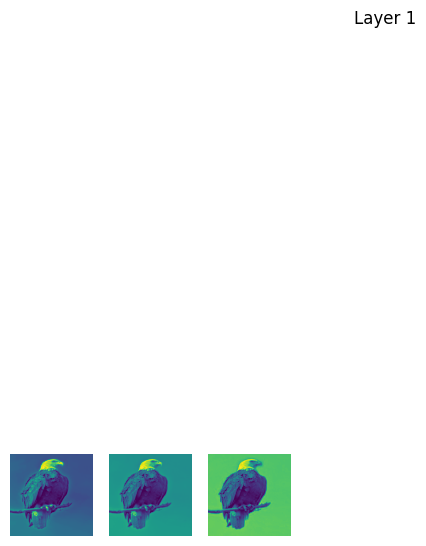

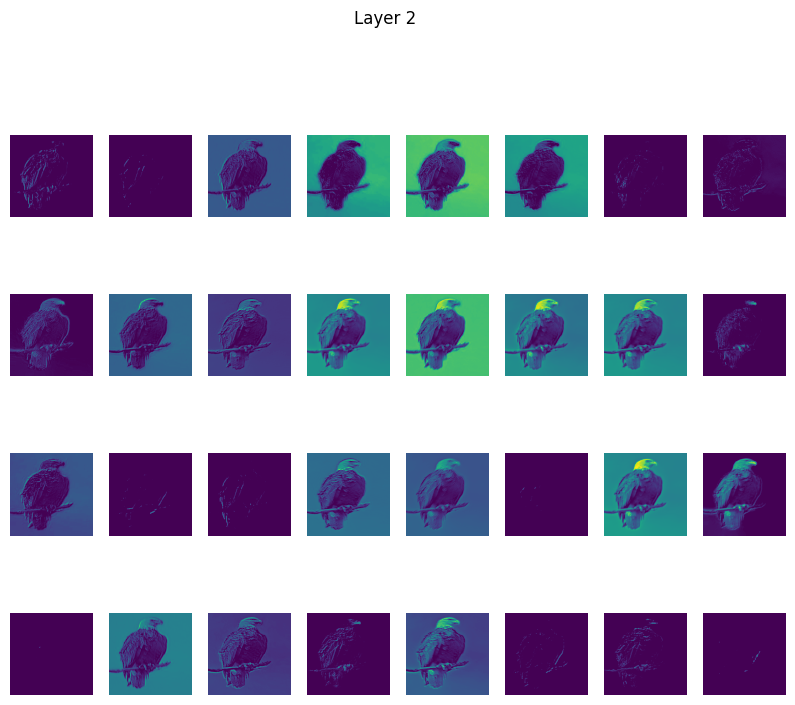

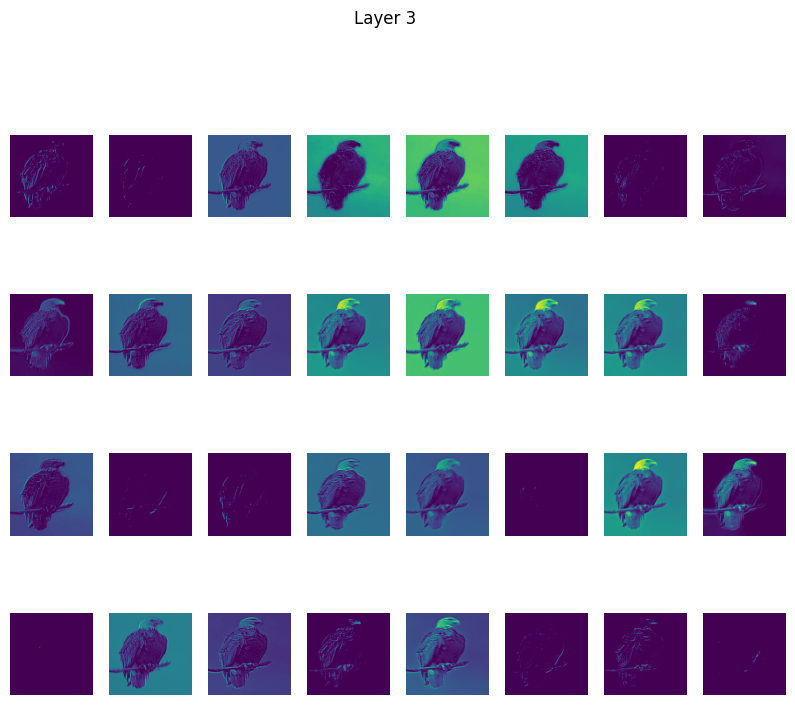

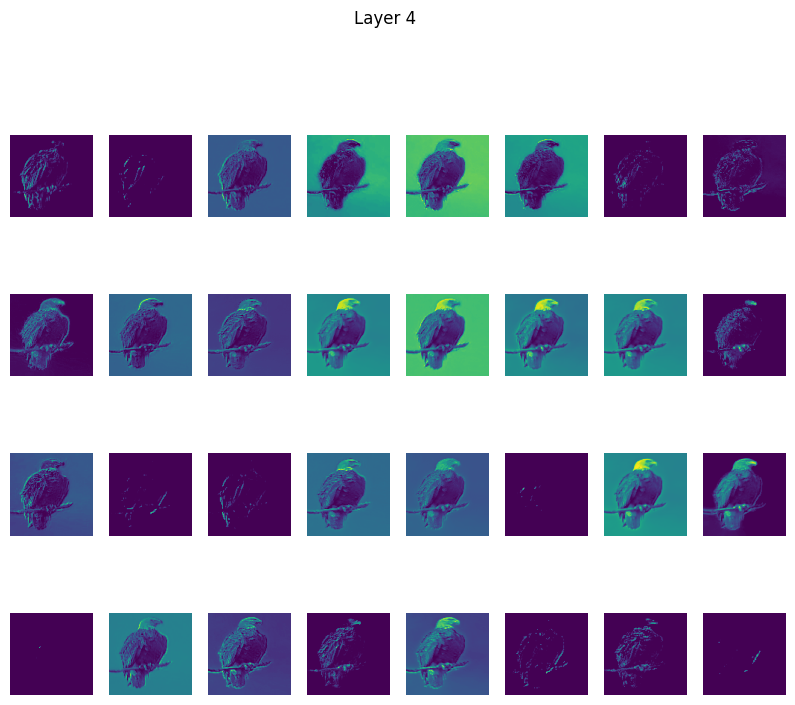

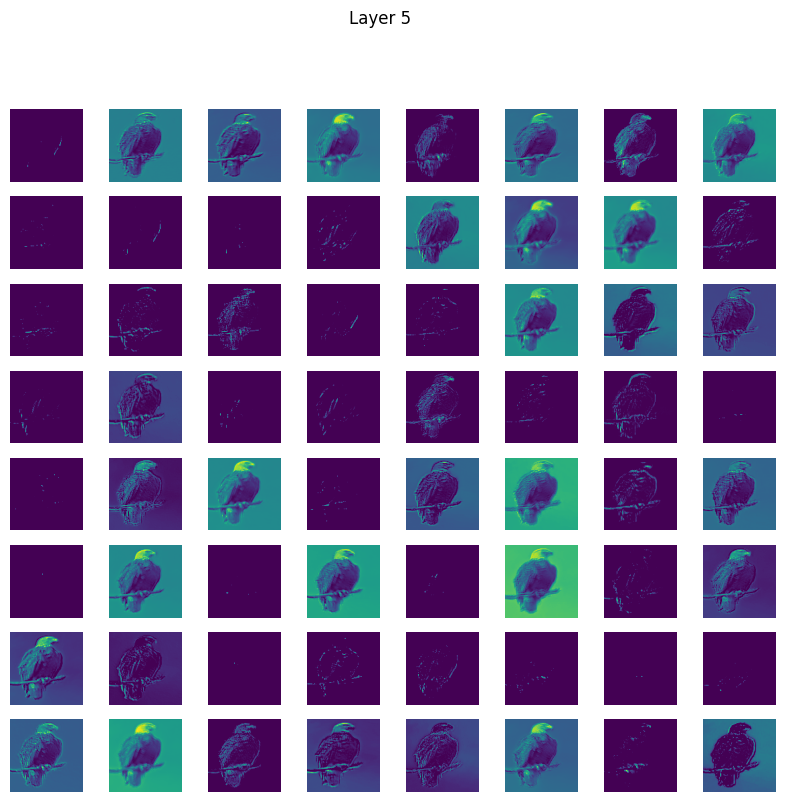

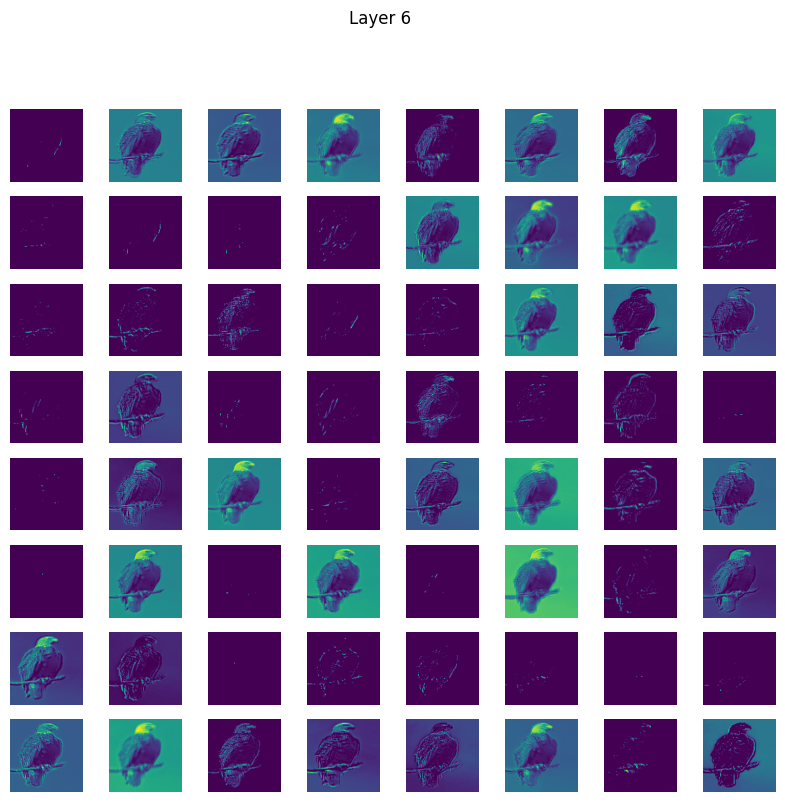

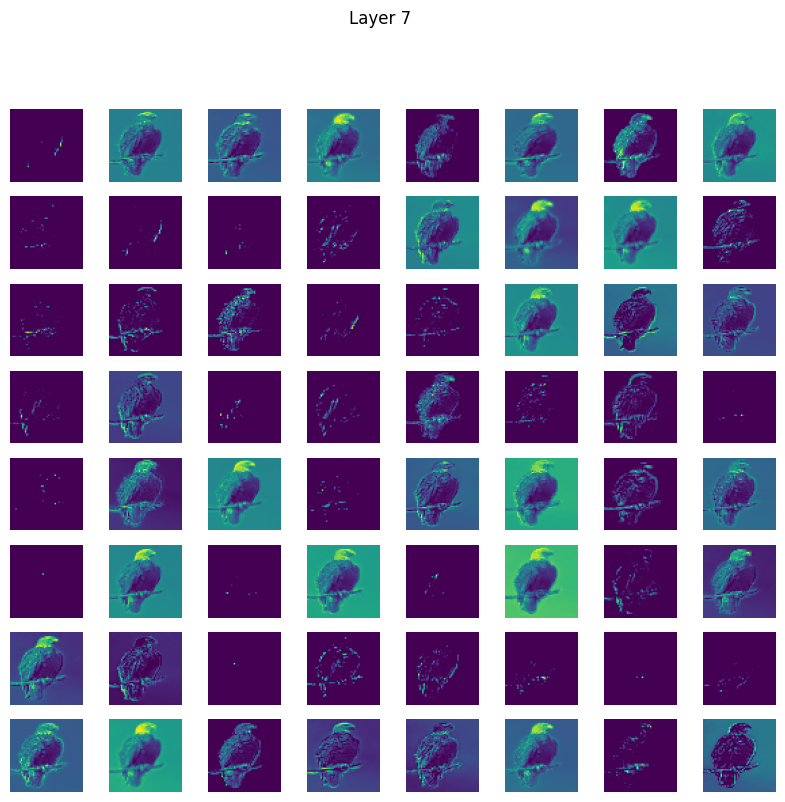

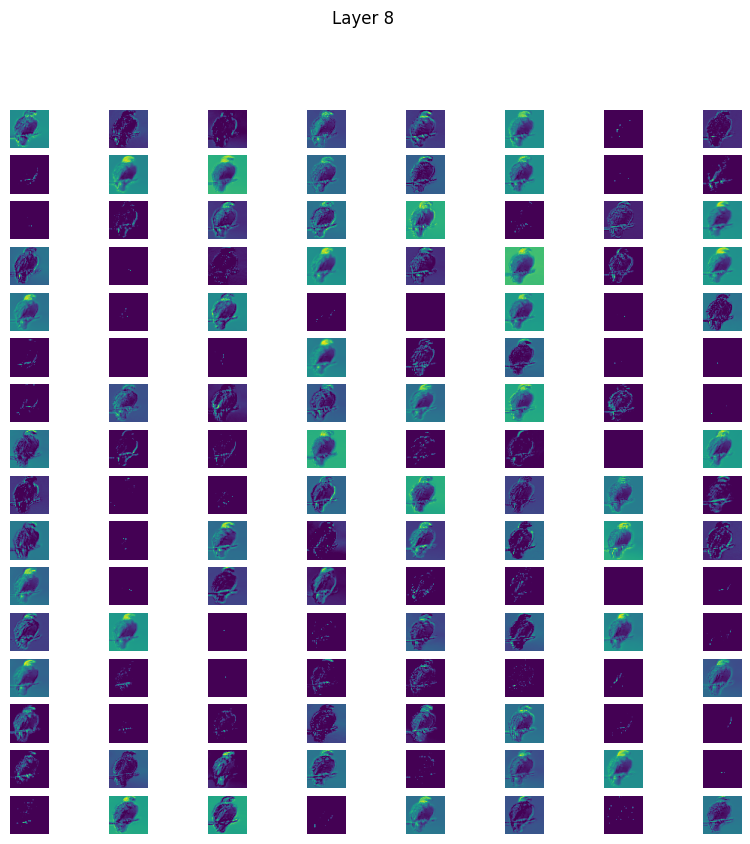

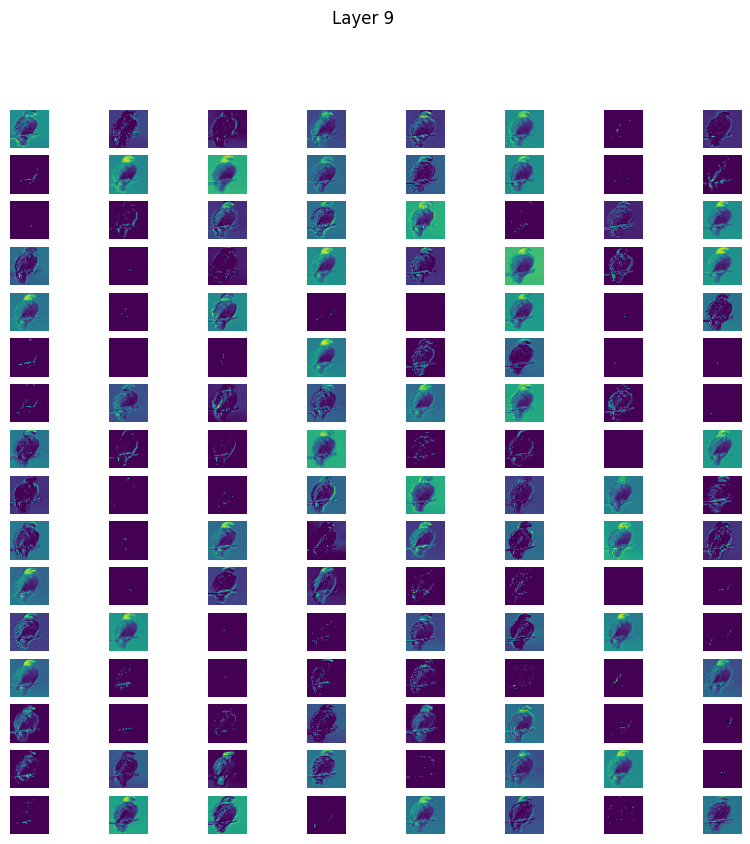

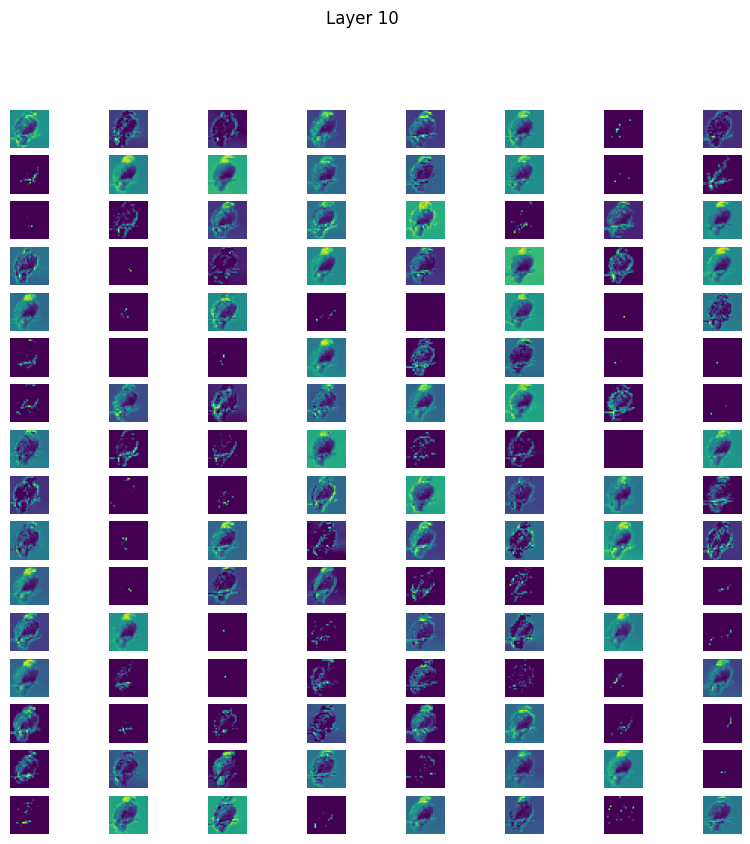

In [22]:
for i, output in enumerate(layer_outputs[:10]):
    # Reshape the feature maps if needed (e.g., if they are 4D tensors)
    if len(output.shape) == 4:
        output = output[0]  # Assuming batch size of 1, you can adjust as needed
    # Plot the feature maps
    num_features = output.shape[-1]
    plt.figure(figsize=(10, 10))
    for j in range(num_features):
        plt.subplot(num_features//8 + 1, 8, j + 1)
        plt.imshow(output[:, :, j], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f'Layer {i+1}')
    plt.show()